<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/index_structs/struct_indices/SQLIndexDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text-to-SQL Guide

This is a basic guide to LlamaIndex's Text-to-SQL capabilities.
1. We first show how to perform text-to-SQL over a toy dataset: this will do "retrieval" (sql query over db) and "synthesis".
2. We then show how to buid a TableIndex over the schema to dynamically retrieve relevant tables during query-time.
3. We finally show you how to define a text-to-SQL retriever on its own.

**NOTE:** Any Text-to-SQL application should be aware that executing
arbitrary SQL queries can be a security risk. It is recommended to
take precautions as needed, such as using restricted roles, read-only
databases, sandboxing, etc.

If you're opening this Notebook on colab, you will probably need to install LlamaIndex ü¶ô.

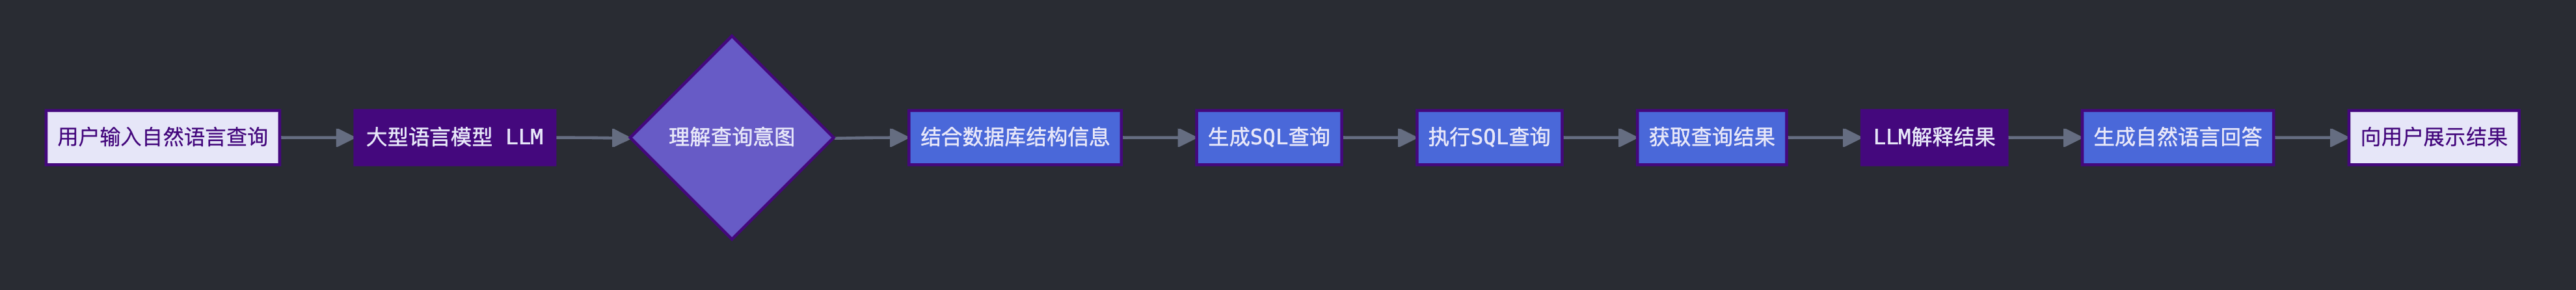

In [1]:
%pip install llama-index-llms-openrouter

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 18.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.5/1.5 MB 21.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76.4/76.4 kB 1.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 77.9/77.9 kB 4.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.3/49.3 kB 1.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [2]:
!pip install llama-index

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 15.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 187.4/187.4 kB 6.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 295.8/295.8 kB 16.3 MB/s eta 0:00:00


In [3]:
import os
from llama_index.llms.openrouter import OpenRouter
from llama_index.core.llms import ChatMessage


In [22]:
os.environ["OPENROUTER_API_KEY"] = "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"


In [ ]:
# import logging
# import sys

# logging.basicConfig(stream=sys.stdout, level=logging.INFO)
# logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

In [5]:
from IPython.display import Markdown, display

### Create Database Schema

‰ΩøÁî® sqlalchemyÔºà‰∏ÄÁßçÊµÅË°åÁöÑ SQL Êï∞ÊçÆÂ∫ìÂ∑•ÂÖ∑ÂåÖÔºâÂàõÂª∫‰∏Ä‰∏™Á©∫ÁöÑÊ®°ÊãüËøõÈîÄÂ≠òÁ≥ªÁªüÁöÑË°®

In [42]:
from sqlalchemy import (
    create_engine,
    MetaData,
    Table,
    Column,
    String,
    Integer,
    Float,
    select,
    insert,
)


In [43]:
# ÂàõÂª∫ÂÜÖÂ≠òÊï∞ÊçÆÂ∫ì
engine = create_engine("sqlite:///:memory:")
metadata_obj = MetaData()

In [44]:
# ÂàõÂª∫‰∫ßÂìÅÂ∫ìÂ≠òË°®

table_name = "product_inventory"
product_inventory_table = Table(
    table_name,
    metadata_obj,
    Column("product_id", String(16), primary_key=True),
    Column("product_name", String(50), nullable=False),
    Column("quantity", Integer),
    Column("unit_price", Float),
    Column("category", String(20)),
)
metadata_obj.create_all(engine)



### Define SQL Database

È¶ñÂÖàÂÆö‰πâ SQLDatabase ÊäΩË±°ÔºàSQLAlchemy ÁöÑËΩªÂûãÂ∞ÅË£ÖÔºâ„ÄÇ

In [9]:
from llama_index.core import SQLDatabase


In [32]:
# ÂàùÂßãÂåñLLM
llm = OpenRouter(
    api_key=os.environ.get("OPENROUTER_API_KEY"),
    max_tokens=4096,
    context_window=131072,
    model="qwen/qwen-2.5-72b-instruct",
)


In [46]:
# ÂàõÂª∫SQLÊï∞ÊçÆÂ∫ìÂØπË±°
sql_database = SQLDatabase(engine, include_tables=["product_inventory"])


We add some testing data to our SQL database.

In [47]:
# ÂàõÂª∫SQLÊï∞ÊçÆÂ∫ìÂØπË±°
sql_database = SQLDatabase(engine, include_tables=["product_inventory"])

# ÊèíÂÖ•50Êù°Á§∫‰æãÊï∞ÊçÆ
rows = [
    {"product_id": "E001", "product_name": "ThinkPad X1Á¨îËÆ∞Êú¨", "quantity": 50, "unit_price": 8999.99, "category": "ÁîµÂ≠ê‰∫ßÂìÅ"},
    {"product_id": "E002", "product_name": "Êà¥Â∞îÊòæÁ§∫Âô®27ÂØ∏", "quantity": 100, "unit_price": 1499.99, "category": "ÁîµÂ≠ê‰∫ßÂìÅ"},
    {"product_id": "E003", "product_name": "ÁΩóÊäÄÊó†Á∫øÈîÆÈº†Â•óË£Ö", "quantity": 200, "unit_price": 299.99, "category": "ÁîµÂ≠ê‰∫ßÂìÅ"},
    {"product_id": "E004", "product_name": "‰Ω≥ËÉΩÊâìÂç∞Êú∫", "quantity": 30, "unit_price": 1999.99, "category": "ÂäûÂÖ¨ËÆæÂ§á"},
    {"product_id": "E005", "product_name": "Âçé‰∏∫ÊâãÊú∫Mate50", "quantity": 80, "unit_price": 5999.99, "category": "ÁîµÂ≠ê‰∫ßÂìÅ"},
    {"product_id": "F001", "product_name": "‰∫∫‰ΩìÂ∑•Â≠¶ÂäûÂÖ¨Ê§Ö", "quantity": 100, "unit_price": 999.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "F002", "product_name": "Èí¢Âà∂Êñá‰ª∂Êüú", "quantity": 40, "unit_price": 799.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "F003", "product_name": "‰ºöËÆÆÊ°å", "quantity": 20, "unit_price": 2999.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "F004", "product_name": "‰π¶Êû∂", "quantity": 60, "unit_price": 599.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "F005", "product_name": "ÂäûÂÖ¨Ê≤ôÂèë", "quantity": 15, "unit_price": 3999.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "S001", "product_name": "ËÆ¢‰π¶Êú∫", "quantity": 500, "unit_price": 15.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "S002", "product_name": "ËÆ∞‰∫ãÊú¨", "quantity": 1000, "unit_price": 9.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "S003", "product_name": "Á≠æÂ≠óÁ¨îÔºàÁõíÔºâ", "quantity": 800, "unit_price": 19.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "S004", "product_name": "Êñá‰ª∂Â§π", "quantity": 600, "unit_price": 5.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "S005", "product_name": "ËÆ°ÁÆóÂô®", "quantity": 300, "unit_price": 39.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "E006", "product_name": "iPad Pro", "quantity": 70, "unit_price": 6499.99, "category": "ÁîµÂ≠ê‰∫ßÂìÅ"},
    {"product_id": "E007", "product_name": "AirPods Pro", "quantity": 150, "unit_price": 1999.99, "category": "ÁîµÂ≠ê‰∫ßÂìÅ"},
    {"product_id": "E008", "product_name": "Êú∫Ê¢∞ÈîÆÁõò", "quantity": 120, "unit_price": 499.99, "category": "ÁîµÂ≠ê‰∫ßÂìÅ"},
    {"product_id": "E009", "product_name": "ÂçéÁ°ïROGÊ∏∏ÊàèÊú¨", "quantity": 40, "unit_price": 12999.99, "category": "ÁîµÂ≠ê‰∫ßÂìÅ"},
    {"product_id": "E010", "product_name": "Á¥¢Â∞ºÈôçÂô™ËÄ≥Êú∫", "quantity": 90, "unit_price": 2499.99, "category": "ÁîµÂ≠ê‰∫ßÂìÅ"},
    {"product_id": "F006", "product_name": "ÁªÑÂêàÂºèÂäûÂÖ¨Ê°å", "quantity": 50, "unit_price": 1599.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "F007", "product_name": "ÂëòÂ∑•ÂÇ®Áâ©Êüú", "quantity": 80, "unit_price": 699.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "F008", "product_name": "ÁôΩÊùø", "quantity": 30, "unit_price": 399.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "F009", "product_name": "ÊäòÂè†‰ºöËÆÆÊ°å", "quantity": 25, "unit_price": 1999.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "F010", "product_name": "Êé•ÂæÖÂâçÂè∞", "quantity": 5, "unit_price": 4999.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "S006", "product_name": "ÂΩ©Ëâ≤‰æøÂà©Ë¥¥", "quantity": 1200, "unit_price": 3.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "S007", "product_name": "Ë£ÅÁ∫∏ÂàÄ", "quantity": 400, "unit_price": 8.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "S008", "product_name": "Êñá‰ª∂Áõí", "quantity": 350, "unit_price": 12.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "S009", "product_name": "ËÉ∂Ê∞¥", "quantity": 700, "unit_price": 4.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "S010", "product_name": "ÂõûÂΩ¢ÈíàÔºàÁõíÔºâ", "quantity": 1500, "unit_price": 2.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "E011", "product_name": "ÊäïÂΩ±‰ª™", "quantity": 25, "unit_price": 3999.99, "category": "ÂäûÂÖ¨ËÆæÂ§á"},
    {"product_id": "E012", "product_name": "Á¢éÁ∫∏Êú∫", "quantity": 35, "unit_price": 599.99, "category": "ÂäûÂÖ¨ËÆæÂ§á"},
    {"product_id": "E013", "product_name": "Êâ´Êèè‰ª™", "quantity": 20, "unit_price": 1299.99, "category": "ÂäûÂÖ¨ËÆæÂ§á"},
    {"product_id": "E014", "product_name": "Â§çÂç∞Êú∫", "quantity": 15, "unit_price": 8999.99, "category": "ÂäûÂÖ¨ËÆæÂ§á"},
    {"product_id": "E015", "product_name": "Ë∑ØÁî±Âô®", "quantity": 40, "unit_price": 399.99, "category": "ÁΩëÁªúËÆæÂ§á"},
    {"product_id": "F011", "product_name": "ÂäûÂÖ¨Â±èÈ£é", "quantity": 60, "unit_price": 899.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "F012", "product_name": "Ê¥ªÂä®Êüú", "quantity": 70, "unit_price": 499.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "F013", "product_name": "Ëå∂Ê∞¥Êüú", "quantity": 10, "unit_price": 1299.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "F014", "product_name": "‰ºëÈó≤Ê≤ôÂèë", "quantity": 8, "unit_price": 2999.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "F015", "product_name": "Á´ãÂºèË°£Êû∂", "quantity": 45, "unit_price": 129.99, "category": "ÂäûÂÖ¨ÂÆ∂ÂÖ∑"},
    {"product_id": "S011", "product_name": "Ëµ∑ÈíâÂô®", "quantity": 450, "unit_price": 7.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "S012", "product_name": "Êñá‰ª∂Ë¢ã", "quantity": 800, "unit_price": 1.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "S013", "product_name": "Ê†áÁ≠æÁ∫∏", "quantity": 600, "unit_price": 11.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "S014", "product_name": "Âø´Âä≥Â§π", "quantity": 550, "unit_price": 2.49, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "S015", "product_name": "Âç∞Ê≥•", "quantity": 200, "unit_price": 9.99, "category": "ÂäûÂÖ¨Áî®ÂìÅ"},
    {"product_id": "E016", "product_name": "ËßÜÈ¢ë‰ºöËÆÆÁ≥ªÁªü", "quantity": 5, "unit_price": 19999.99, "category": "ÂäûÂÖ¨ËÆæÂ§á"},
    {"product_id": "E017", "product_name": "ËÄÉÂã§Êú∫", "quantity": 10, "unit_price": 999.99, "category": "ÂäûÂÖ¨ËÆæÂ§á"},
    {"product_id": "E018", "product_name": "Êù°Á†ÅÊâ´ÊèèÊû™", "quantity": 30, "unit_price": 599.99, "category": "ÂäûÂÖ¨ËÆæÂ§á"},
    {"product_id": "E019", "product_name": "UPS‰∏çÈó¥Êñ≠ÁîµÊ∫ê", "quantity": 20, "unit_price": 1999.99, "category": "ÁîµÂ≠ê‰∫ßÂìÅ"},
    {"product_id": "E020", "product_name": "ÁîµËØù‰ºöËÆÆËÆæÂ§á", "quantity": 8, "unit_price": 2999.99, "category": "ÂäûÂÖ¨ËÆæÂ§á"},
]

for row in rows:
    stmt = insert(product_inventory_table).values(**row)
    with engine.begin() as connection:
        connection.execute(stmt)


In [49]:
# Êü•ÁúãÂΩìÂâçË°®ÂÜÖÂÆπ
stmt = select(
    product_inventory_table.c.product_id,
    product_inventory_table.c.product_name,
    product_inventory_table.c.quantity,
    product_inventory_table.c.unit_price,
    product_inventory_table.c.category,
).select_from(product_inventory_table)



### Query Index

In [50]:
#ÊºîÁ§∫Â¶Ç‰ΩïÊâßË°åÂéüÂßã SQL Êü•ËØ¢ÔºåËØ•Êü•ËØ¢ÂèØÁõ¥Êé•Âú®Ë°®‰∏äÊâßË°å
from sqlalchemy import text

with engine.connect() as connection:
    results = connection.execute(stmt).fetchall()
    for row in results:
        print(row)


('E001', 'ThinkPad X1Á¨îËÆ∞Êú¨', 50, 8999.99, 'ÁîµÂ≠ê‰∫ßÂìÅ')
('E002', 'Êà¥Â∞îÊòæÁ§∫Âô®27ÂØ∏', 100, 1499.99, 'ÁîµÂ≠ê‰∫ßÂìÅ')
('E003', 'ÁΩóÊäÄÊó†Á∫øÈîÆÈº†Â•óË£Ö', 200, 299.99, 'ÁîµÂ≠ê‰∫ßÂìÅ')
('E004', '‰Ω≥ËÉΩÊâìÂç∞Êú∫', 30, 1999.99, 'ÂäûÂÖ¨ËÆæÂ§á')
('E005', 'Âçé‰∏∫ÊâãÊú∫Mate50', 80, 5999.99, 'ÁîµÂ≠ê‰∫ßÂìÅ')
('F001', '‰∫∫‰ΩìÂ∑•Â≠¶ÂäûÂÖ¨Ê§Ö', 100, 999.99, 'ÂäûÂÖ¨ÂÆ∂ÂÖ∑')
('F002', 'Èí¢Âà∂Êñá‰ª∂Êüú', 40, 799.99, 'ÂäûÂÖ¨ÂÆ∂ÂÖ∑')
('F003', '‰ºöËÆÆÊ°å', 20, 2999.99, 'ÂäûÂÖ¨ÂÆ∂ÂÖ∑')
('F004', '‰π¶Êû∂', 60, 599.99, 'ÂäûÂÖ¨ÂÆ∂ÂÖ∑')
('F005', 'ÂäûÂÖ¨Ê≤ôÂèë', 15, 3999.99, 'ÂäûÂÖ¨ÂÆ∂ÂÖ∑')
('S001', 'ËÆ¢‰π¶Êú∫', 500, 15.99, 'ÂäûÂÖ¨Áî®ÂìÅ')
('S002', 'ËÆ∞‰∫ãÊú¨', 1000, 9.99, 'ÂäûÂÖ¨Áî®ÂìÅ')
('S003', 'Á≠æÂ≠óÁ¨îÔºàÁõíÔºâ', 800, 19.99, 'ÂäûÂÖ¨Áî®ÂìÅ')
('S004', 'Êñá‰ª∂Â§π', 600, 5.99, 'ÂäûÂÖ¨Áî®ÂìÅ')
('S005', 'ËÆ°ÁÆóÂô®', 300, 39.99, 'ÂäûÂÖ¨Áî®ÂìÅ')
('E006', 'iPad Pro', 70, 6499.99, 'ÁîµÂ≠ê‰∫ßÂìÅ')
('E007', 'AirPods Pro', 150, 1999.99, 'ÁîµÂ≠ê‰∫ßÂìÅ')
('E008', 'Êú∫Ê¢∞ÈîÆÁõò', 120, 499.99, 'ÁîµÂ≠ê‰∫ßÂìÅ')
('E00

## Part 1: Text-to-SQL Query Engine
Once we have constructed our SQL database, we can use the NLSQLTableQueryEngine to
construct natural language queries that are synthesized into SQL queries.

Note that we need to specify the tables we want to use with this query engine.
If we don't the query engine will pull all the schema context, which could
overflow the context window of the LLM.

In [53]:
from llama_index.core.query_engine import NLSQLTableQueryEngine

# ÂàõÂª∫Êü•ËØ¢ÂºïÊìé
query_engine = NLSQLTableQueryEngine(
    sql_database=sql_database, tables=["product_inventory"], llm=llm
)

# Á§∫‰æãÊü•ËØ¢
query_str = "Âì™‰∏™Á±ªÂà´ÁöÑ‰∫ßÂìÅÁßçÁ±ªÊúÄÂ§öÔºü"
response = query_engine.query(query_str)

display(Markdown(f"<b>{response}</b>"))

<b>Ê†πÊçÆÊü•ËØ¢ÁªìÊûúÔºå‰∫ßÂìÅÁßçÁ±ªÊúÄÂ§öÁöÑÁ±ªÂà´ÊòØÂäûÂÖ¨Áî®ÂìÅÔºåÂÖ±Êúâ15Áßç‰∏çÂêåÁöÑ‰∫ßÂìÅ„ÄÇ</b>

In [54]:
# Á§∫‰æãÊü•ËØ¢2ÔºöÈ´ò‰ª∑ÂÄº‰∫ßÂìÅ
query_str = "ÂàóÂá∫Âçï‰ª∑Ë∂ÖËøá5000ÂÖÉÁöÑÊâÄÊúâ‰∫ßÂìÅÂêçÁß∞Âíå‰ª∑Ê†ºÔºåÊåâ‰ª∑Ê†º‰ªéÈ´òÂà∞‰ΩéÊéíÂ∫è„ÄÇ"
response = query_engine.query(query_str)
display(Markdown(f"<b>Êü•ËØ¢2Ôºö{query_str}</b>\n{response}"))


<b>Êü•ËØ¢2ÔºöÂàóÂá∫Âçï‰ª∑Ë∂ÖËøá5000ÂÖÉÁöÑÊâÄÊúâ‰∫ßÂìÅÂêçÁß∞Âíå‰ª∑Ê†ºÔºåÊåâ‰ª∑Ê†º‰ªéÈ´òÂà∞‰ΩéÊéíÂ∫è„ÄÇ</b>
‰ª•‰∏ãÊòØÂçï‰ª∑Ë∂ÖËøá5000ÂÖÉÁöÑÊâÄÊúâ‰∫ßÂìÅÂêçÁß∞Âíå‰ª∑Ê†ºÔºåÊåâ‰ª∑Ê†º‰ªéÈ´òÂà∞‰ΩéÊéíÂ∫èÔºö

1. ËßÜÈ¢ë‰ºöËÆÆÁ≥ªÁªü - 19999.99ÂÖÉ
2. ÂçéÁ°ïROGÊ∏∏ÊàèÊú¨ - 12999.99ÂÖÉ
3. ThinkPad X1Á¨îËÆ∞Êú¨ - 8999.99ÂÖÉ
4. Â§çÂç∞Êú∫ - 8999.99ÂÖÉ
5. iPad Pro - 6499.99ÂÖÉ
6. Âçé‰∏∫ÊâãÊú∫Mate50 - 5999.99ÂÖÉ

In [55]:
# Á§∫‰æãÊü•ËØ¢3ÔºöÂ∫ìÂ≠òÁÆ°ÁêÜ
query_str = "Âì™‰∫õ‰∫ßÂìÅÁöÑÂ∫ìÂ≠òÊï∞Èáè‰Ωé‰∫é30‰ª∂ÔºüËØ∑ÂàóÂá∫‰∫ßÂìÅÂêçÁß∞ÂíåÂÖ∑‰ΩìÊï∞Èáè„ÄÇ"
response = query_engine.query(query_str)
display(Markdown(f"<b>Êü•ËØ¢3Ôºö{query_str}</b>\n{response}"))



<b>Êü•ËØ¢3ÔºöÂì™‰∫õ‰∫ßÂìÅÁöÑÂ∫ìÂ≠òÊï∞Èáè‰Ωé‰∫é30‰ª∂ÔºüËØ∑ÂàóÂá∫‰∫ßÂìÅÂêçÁß∞ÂíåÂÖ∑‰ΩìÊï∞Èáè„ÄÇ</b>
‰ª•‰∏ã‰∫ßÂìÅÁöÑÂ∫ìÂ≠òÊï∞Èáè‰Ωé‰∫é30‰ª∂Ôºö

- ‰ºöËÆÆÊ°åÔºö20‰ª∂
- ÂäûÂÖ¨Ê≤ôÂèëÔºö15‰ª∂
- ÊäòÂè†‰ºöËÆÆÊ°åÔºö25‰ª∂
- Êé•ÂæÖÂâçÂè∞Ôºö5‰ª∂
- ÊäïÂΩ±‰ª™Ôºö25‰ª∂
- Êâ´Êèè‰ª™Ôºö20‰ª∂
- Â§çÂç∞Êú∫Ôºö15‰ª∂
- Ëå∂Ê∞¥ÊüúÔºö10‰ª∂
- ‰ºëÈó≤Ê≤ôÂèëÔºö8‰ª∂
- ËßÜÈ¢ë‰ºöËÆÆÁ≥ªÁªüÔºö5‰ª∂
- ËÄÉÂã§Êú∫Ôºö10‰ª∂
- UPS‰∏çÈó¥Êñ≠ÁîµÊ∫êÔºö20‰ª∂
- ÁîµËØù‰ºöËÆÆËÆæÂ§áÔºö8‰ª∂

In [ ]:
# Á§∫‰æãÊü•ËØ¢4ÔºöÁ±ªÂà´ÂàÜÊûê
query_str = "ËÆ°ÁÆóÊØè‰∏™Á±ªÂà´ÁöÑÂπ≥ÂùáÂçï‰ª∑ÔºåÂπ∂ÊåâÂπ≥ÂùáÂçï‰ª∑‰ªéÈ´òÂà∞‰ΩéÊéíÂ∫è„ÄÇ"
response = query_engine.query(query_str)
display(Markdown(f"<b>Êü•ËØ¢4Ôºö{query_str}</b>\n{response}"))


In [ ]:
# Á§∫‰æãÊü•ËØ¢5ÔºöÂ∫ìÂ≠ò‰ª∑ÂÄº
query_str = "ËÆ°ÁÆóÊÄªÂ∫ìÂ≠ò‰ª∑ÂÄºÊúÄÈ´òÁöÑÂâç5Áßç‰∫ßÂìÅÔºåÊòæÁ§∫‰∫ßÂìÅÂêçÁß∞„ÄÅÊï∞Èáè„ÄÅÂçï‰ª∑ÂíåÊÄª‰ª∑ÂÄº„ÄÇ"
response = query_engine.query(query_str)
display(Markdown(f"<b>Êü•ËØ¢5Ôºö{query_str}</b>\n{response}"))



In [ ]:
# Á§∫‰æãÊü•ËØ¢6Ôºö‰∫ßÂìÅÂ§öÊ†∑ÊÄß
query_str = "Âú®'ÂäûÂÖ¨Áî®ÂìÅ'Á±ªÂà´‰∏≠ÔºåÂçï‰ª∑‰Ωé‰∫é10ÂÖÉÁöÑ‰∫ßÂìÅÊúâÂì™‰∫õÔºüËØ∑ÂàóÂá∫ÂÆÉ‰ª¨ÁöÑÂêçÁß∞Âíå‰ª∑Ê†º„ÄÇ"
response = query_engine.query(query_str)
display(Markdown(f"<b>Êü•ËØ¢6Ôºö{query_str}</b>\n{response}"))



In [ ]:
# Á§∫‰æãÊü•ËØ¢7ÔºöÂ∫ìÂ≠òÂë®ËΩ¨
query_str = "ÂÅáËÆæÊúàÈîÄÈáèÊòØÂΩìÂâçÂ∫ìÂ≠òÁöÑ10%ÔºåÂì™‰∫õ‰∫ßÂìÅÁöÑÂ∫ìÂ≠òÂèØ‰ª•ÊîØÊíëË∂ÖËøá12‰∏™ÊúàÔºüÂàóÂá∫‰∫ßÂìÅÂêçÁß∞ÂíåÈ¢ÑËÆ°ÂèØÊîØÊíëÁöÑÊúàÊï∞„ÄÇ"
response = query_engine.query(query_str)
display(Markdown(f"<b>Êü•ËØ¢7Ôºö{query_str}</b>\n{response}"))


In [56]:
# Á§∫‰æãÊü•ËØ¢8Ôºö‰ª∑Ê†ºÂå∫Èó¥ÂàÜÊûê
query_str = "Â∞Ü‰∫ßÂìÅÊåâ‰ª∑Ê†ºÂàíÂàÜ‰∏∫‰∏âÁ±ªÔºö‰Ωé‰ª∑Ôºà1000ÂÖÉ‰ª•‰∏ãÔºâÔºå‰∏≠‰ª∑Ôºà1000-5000ÂÖÉÔºâÔºåÈ´ò‰ª∑Ôºà5000ÂÖÉ‰ª•‰∏äÔºâ„ÄÇËÆ°ÁÆóÊØèÁ±ª‰∫ßÂìÅÁöÑÊï∞ÈáèÂíåÂπ≥ÂùáÂçï‰ª∑„ÄÇ"
response = query_engine.query(query_str)
display(Markdown(f"<b>Êü•ËØ¢8Ôºö{query_str}</b>\n{response}"))


<b>Êü•ËØ¢8ÔºöÂ∞Ü‰∫ßÂìÅÊåâ‰ª∑Ê†ºÂàíÂàÜ‰∏∫‰∏âÁ±ªÔºö‰Ωé‰ª∑Ôºà1000ÂÖÉ‰ª•‰∏ãÔºâÔºå‰∏≠‰ª∑Ôºà1000-5000ÂÖÉÔºâÔºåÈ´ò‰ª∑Ôºà5000ÂÖÉ‰ª•‰∏äÔºâ„ÄÇËÆ°ÁÆóÊØèÁ±ª‰∫ßÂìÅÁöÑÊï∞ÈáèÂíåÂπ≥ÂùáÂçï‰ª∑„ÄÇ</b>
Ê†πÊçÆÊü•ËØ¢ÁªìÊûúÔºå‰∫ßÂìÅÊåâ‰ª∑Ê†ºÂàÜÁ±ªÂ¶Ç‰∏ãÔºö

- ‰Ωé‰ª∑Ôºà1000ÂÖÉ‰ª•‰∏ãÔºâÔºöÂÖ±Êúâ29‰∏™‰∫ßÂìÅÔºåÂπ≥ÂùáÂçï‰ª∑‰∏∫296.21ÂÖÉ„ÄÇ
- ‰∏≠‰ª∑Ôºà1000-5000ÂÖÉÔºâÔºöÂÖ±Êúâ15‰∏™‰∫ßÂìÅÔºåÂπ≥ÂùáÂçï‰ª∑‰∏∫2546.66ÂÖÉ„ÄÇ
- È´ò‰ª∑Ôºà5000ÂÖÉ‰ª•‰∏äÔºâÔºöÂÖ±Êúâ6‰∏™‰∫ßÂìÅÔºåÂπ≥ÂùáÂçï‰ª∑‰∏∫10583.32ÂÖÉ„ÄÇ